In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



Matplotlib is building the font cache; this may take a moment.


In [3]:
from datasets import load_dataset

# dataset = load_dataset("ucsbnlp/liar")
# dataset = load_dataset("ucsbnlp/liar", split="train")
# dataset.save_to_disk('liar_dataset')

In [4]:
# Load dataset
df = pd.read_csv('./liar_dataset/train.tsv', delimiter='\t', header=None)
df.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 
              'state', 'party', 'barely_true_counts', 'false_counts', 
              'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context']

print(df)

               id        label  \
0       2635.json        false   
1      10540.json    half-true   
2        324.json  mostly-true   
3       1123.json        false   
4       9028.json    half-true   
...           ...          ...   
10235   5473.json  mostly-true   
10236   3408.json  mostly-true   
10237   3959.json    half-true   
10238   2253.json        false   
10239   1155.json   pants-fire   

                                               statement  \
0      Says the Annies List political group supports ...   
1      When did the decline of coal start? It started...   
2      Hillary Clinton agrees with John McCain "by vo...   
3      Health care reform legislation is likely to ma...   
4      The economic turnaround started at the end of ...   
...                                                  ...   
10235  There are a larger number of shark attacks in ...   
10236  Democrats have now become the party of the [At...   
10237  Says an alternative to Social Security that 

In [5]:
# Select necessary columns
df = df[['label', 'statement']]

# Map labels to binary classification
df['label'] = df['label'].map({
    'true': 1, 
    'mostly-true': 1, 
    'half-true': 1, 
    'barely-true': 0, 
    'false': 0, 
    'pants-fire': 0
})
print(df)

       label                                          statement
0          0  Says the Annies List political group supports ...
1          1  When did the decline of coal start? It started...
2          1  Hillary Clinton agrees with John McCain "by vo...
3          0  Health care reform legislation is likely to ma...
4          1  The economic turnaround started at the end of ...
...      ...                                                ...
10235      1  There are a larger number of shark attacks in ...
10236      1  Democrats have now become the party of the [At...
10237      1  Says an alternative to Social Security that op...
10238      0  On lifting the U.S. Cuban embargo and allowing...
10239      0  The Department of Veterans Affairs has a manua...

[10240 rows x 2 columns]


In [6]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['statement'], df['label'], test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

550     We are now, for the first time ever, energy in...
7231    Were not engaged in nation-building in Afghani...
2515    Because of President Barack Obamas failure to ...
4466    New carbon regulations will increase electric ...
211     Obamacare is the biggest tax increase in Ameri...
                              ...                        
5734    When I took office, the deficit was nearly 10 ...
5191                      On the mosque near ground zero.
5390    Louie Gohmert of Texas blamed the mass shootin...
860     The Governor did not consult members of his ow...
7270    A telecom bill could keep the State Corporatio...
Name: statement, Length: 8192, dtype: object 3842     Polling shows that nearly 74 percent of Nation...
6480         I left the city with $43 million in the bank.
4521     Says she couldn't take stimulus money because ...
4026     The United States is the only industrialized c...
10111    The Health Care and Education Reconciliation A...
                      

In [7]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)

In [8]:
# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

In [9]:
# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)
print(X_test_tfidf)

  (0, 320)	0.16853232521597145
  (0, 438)	0.32247722841075743
  (0, 488)	0.26297772295211475
  (0, 821)	0.2869991588431989
  (0, 1689)	0.10741925220949278
  (0, 1879)	0.22171723590846704
  (0, 2645)	0.23337345106799107
  (0, 2815)	0.20074456763133275
  (0, 2825)	0.2050480889229645
  (0, 2927)	0.07945473265228409
  (0, 3179)	0.1336593237833107
  (0, 3285)	0.33593078688508177
  (0, 3760)	0.3044049846117915
  (0, 3818)	0.32247722841075743
  (0, 3884)	0.24719780808431074
  (0, 4023)	0.2559032978761419
  (0, 4269)	0.21270321718245078
  (0, 4416)	0.11427406975532184
  (1, 118)	0.5059616635223685
  (1, 506)	0.4826503671556121
  (1, 859)	0.34974615607953935
  (1, 2071)	0.13340486995502887
  (1, 2435)	0.4268354590764318
  (1, 2689)	0.2822180759174692
  (1, 4418)	0.20987542348952018
  :	:
  (2045, 4418)	0.06577700292344864
  (2045, 4479)	0.08977455349680387
  (2045, 4916)	0.20274761682503892
  (2046, 499)	0.39415847155646533
  (2046, 679)	0.4032896825109492
  (2046, 1804)	0.35959394504831593
  (

In [10]:
# Debug: Check shapes and types
print("X_train_tfidf shape:", X_train_tfidf.shape)
print("y_train shape:", y_train.shape)
print("Data types:", type(X_train_tfidf), type(y_train))

X_train_tfidf shape: (8192, 5000)
y_train shape: (8192,)
Data types: <class 'scipy.sparse._csr.csr_matrix'> <class 'pandas.core.series.Series'>


In [11]:
# Initialize Logistic Regression
model = LogisticRegression()

In [12]:
# Train the model
try:
    model.fit(X_train_tfidf, y_train)
    print("Model trained successfully.")
except ValueError as e:
    print("Error during model fitting:", e)
    print("Ensure X_train_tfidf and y_train are compatible and have correct shapes.")
    raise

Model trained successfully.


In [13]:
# Predict on the test set
y_pred = model.predict(X_test_tfidf)

In [14]:
# Print Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6162109375
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.47      0.52       888
           1       0.64      0.73      0.68      1160

    accuracy                           0.62      2048
   macro avg       0.61      0.60      0.60      2048
weighted avg       0.61      0.62      0.61      2048



In [15]:
# Save the model and vectorizer
joblib.dump(model, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [16]:
X = vectorizer.transform(["""
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.
"""])
prediction = model.predict(X)
print(X)
print(prediction)

  (0, 41)	0.19149870199261423
  (0, 333)	0.14271281356366564
  (0, 354)	0.08919275942881646
  (0, 357)	0.1613100004574487
  (0, 553)	0.09240418688762565
  (0, 628)	0.16532853634779976
  (0, 706)	0.10486158475198264
  (0, 1486)	0.16710575777813994
  (0, 1503)	0.12612210234725157
  (0, 1659)	0.11673323633951166
  (0, 1912)	0.13758535031688496
  (0, 2071)	0.042753754890985984
  (0, 2082)	0.13100373346604258
  (0, 2105)	0.2818711842666509
  (0, 2165)	0.10697779619711129
  (0, 2199)	0.06311221845316432
  (0, 2215)	0.24427008785116847
  (0, 2473)	0.11598050612946498
  (0, 2553)	0.11980773593739988
  (0, 2754)	0.07736869880292267
  (0, 2889)	0.08416082747486733
  (0, 2927)	0.1764865430408136
  (0, 2967)	0.09505138893527978
  (0, 3627)	0.15266049226345033
  (0, 3706)	0.16368308631120393
  (0, 3716)	0.19149870199261423
  (0, 4039)	0.1621512089758267
  (0, 4041)	0.09716760038040842
  (0, 4146)	0.1734932821279068
  (0, 4407)	0.39577245268476213
  (0, 4418)	0.2017833925374157
  (0, 4479)	0.0459000

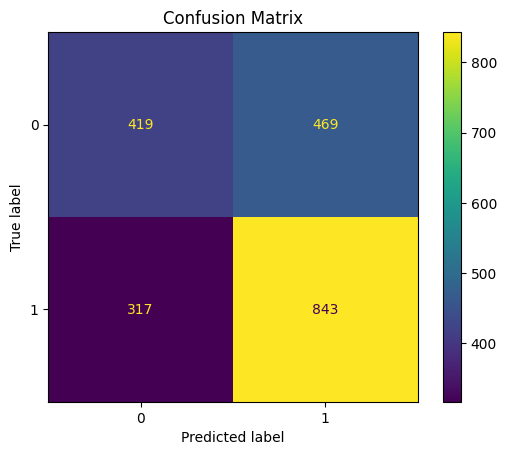

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')

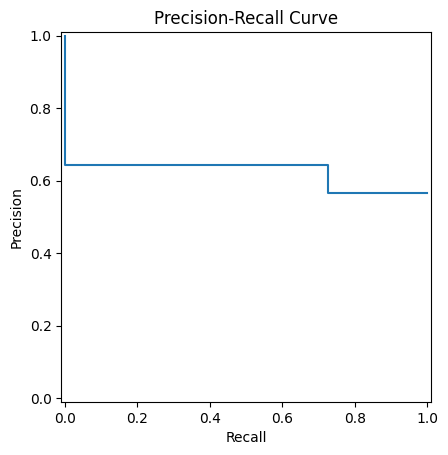

In [23]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve')
plt.savefig('precision_recall_curve.png')

/Users/roman/ws/Now/fakeNews/env/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


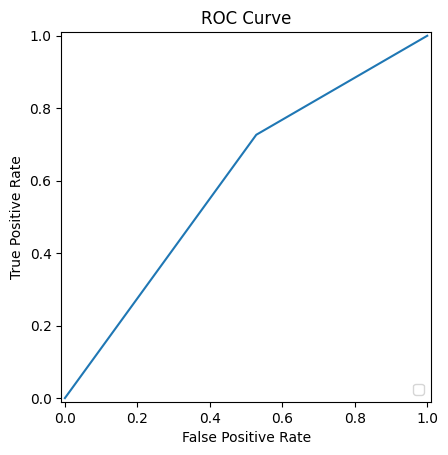

In [24]:
from sklearn.metrics import roc_curve, RocCurveDisplay
fpr, tpr, _ = roc_curve(y_test, y_pred)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC Curve')
plt.savefig('roc_curve.png')

In [27]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Articles')
plt.savefig('word_cloud.png')

NameError: name 'text_data' is not defined

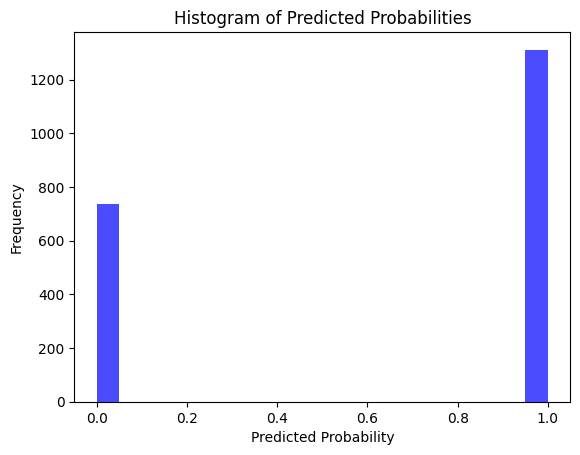

In [29]:
plt.hist(y_pred, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.savefig('predicted_probabilities_histogram.png')

In [30]:
import matplotlib.pyplot as plt
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)]
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.savefig('performance_metrics.png')

NameError: name 'precision_score' is not defined

In [31]:
text_lengths = [len(text) for text in text_data]
plt.boxplot(text_lengths)
plt.title('Box Plot of Text Lengths')
plt.ylabel('Length (characters)')
plt.savefig('text_length_boxplot.png')

NameError: name 'text_data' is not defined

In [32]:
import seaborn as sns
correlation_matrix = pd.DataFrame(X).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.savefig('feature_correlation_heatmap.png')

ValueError: setting an array element with a sequence.